## Linear Regression Of Envi apples by predicting the next time step using the previous observation

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### ***Prepare Dataset of Envi Apples***

In [2]:
df_envi_inter = pd.read_csv("../../../DataSet/Envi/envi.csv")
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Envi    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [3]:
df_envi_inter

,Date,Envi
0,04/01/2015,44562
1,11/01/2015,38112
2,18/01/2015,50355
3,25/01/2015,51922
4,01/02/2015,67496
...,...,...
164,25/02/2018,42116
165,04/03/2018,44454
166,11/03/2018,28399
167,18/03/2018,49145


In [4]:
df_envi_inter["Date"] = pd.to_datetime(df_envi_inter["Date"], format="%d/%m/%Y")
df_envi_inter.sort_values(by="Date", inplace=True)
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Envi    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


predict the next time step using the previous observation

In [5]:
df_envi_inter["y"] = df_envi_inter["Envi"].shift(-1)
df_envi_inter.dropna(inplace=True)
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    168 non-null    datetime64[ns]
 1   Envi    168 non-null    int64         
 2   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.2 KB


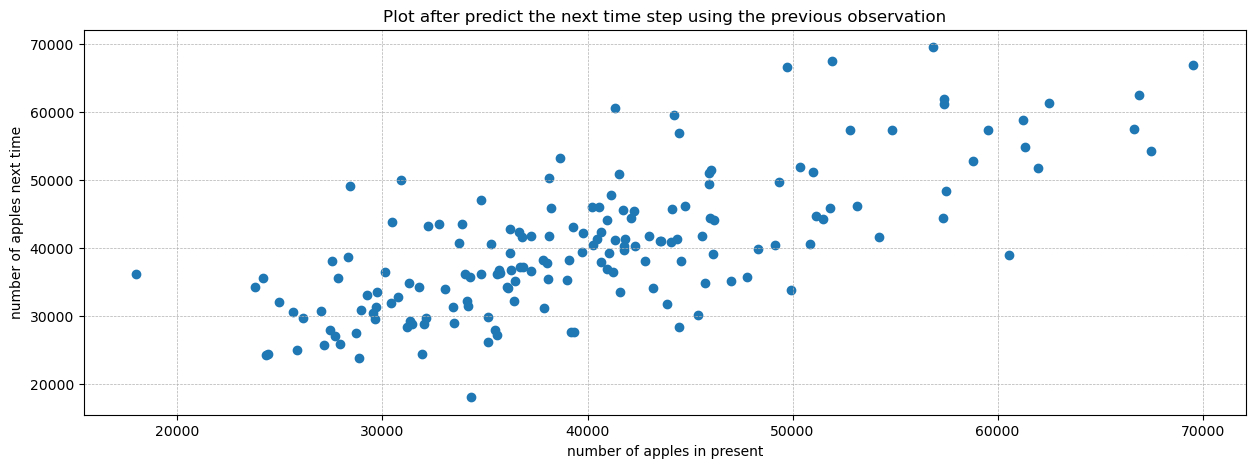

In [6]:
plt.figure(figsize=(15,5))
plt.scatter(df_envi_inter["Envi"], df_envi_inter["y"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.title("Plot after predict the next time step using the previous observation")
plt.grid(linestyle='--', linewidth='0.5')
plt.show()

In [7]:
def writeEvaluate(model, mae:np.float64, mse:np.float64, r2:np.float64, mape:np.float64, filename):
    df = pd.read_csv(filename)
    row_index = df.index.get_loc(df.loc[df['Model'] == model].index[0])
    df.at[row_index,'Mae'] = mae
    df.at[row_index,'Mse'] = mse
    df.at[row_index,'R2'] = r2
    df.at[row_index,'Mape'] = mape

    df.to_csv(filename,encoding='utf-8', sep=',', index=False)

In [8]:
def findBestRandomState(r,t, x, y):
    random = 0
    a = 1000000

    model = LinearRegression()
    for _ in range(r,t):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
        model.fit(x_train[:,1:], y_train[:,1:])

        y_predict = model.predict(x_test[:,1:])
        if (buff := mean_absolute_error(y_test[:, 1:], y_predict)) < a:
            a = buff
            random = _
    print(a, random)

Train Test Split

In [9]:
x = np.array(df_envi_inter.drop(columns='y'))
y = np.array(df_envi_inter.drop(columns='Envi'))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=257002)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

In [11]:
# findBestRandomState(1,1000000,x, y)

#Seed 257002 with MAE 2886.152780308073

### ***Train Model Of Envi Apples***

In [12]:
model = LinearRegression()
model.fit(x_train[:, 1:], y_train[:, 1:])

LinearRegression()

### ***Predict from test_dataset Of Envi Apples***

Mean Absolute Error: 2886.1527803080726
Mean Square Error: 14092241.65682364
R2 score: 0.690218488501405
Mean Absolute Percentage Error: 0.07535438210575111


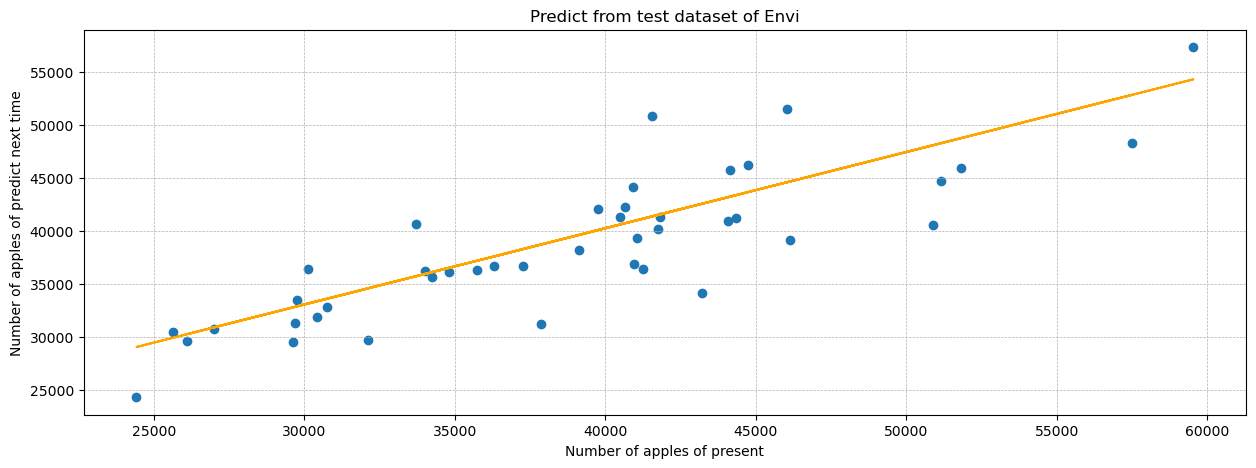

In [13]:
x_test
y_predict = model.predict(x_test[:, 1:])

mae = mean_absolute_error(y_test[:, 1:], y_predict)
mse = mean_squared_error(y_test[:, 1:], y_predict)
r2 = r2_score(y_test[:, 1:], y_predict)
mape = mean_absolute_percentage_error(y_test[:, 1:], y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"R2 score: {r2}")
print(f"Mean Absolute Percentage Error: {mape}")

writeEvaluate("Linear", mae, mse, r2, mape, "evaluate.csv")


plt.figure(figsize=(15,5))
plt.scatter(x_test[:, 1:], y_test[:, 1:])
plt.plot(x_test[:, 1:], y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Envi")
plt.grid(linestyle='--', linewidth='0.5')
plt.show()

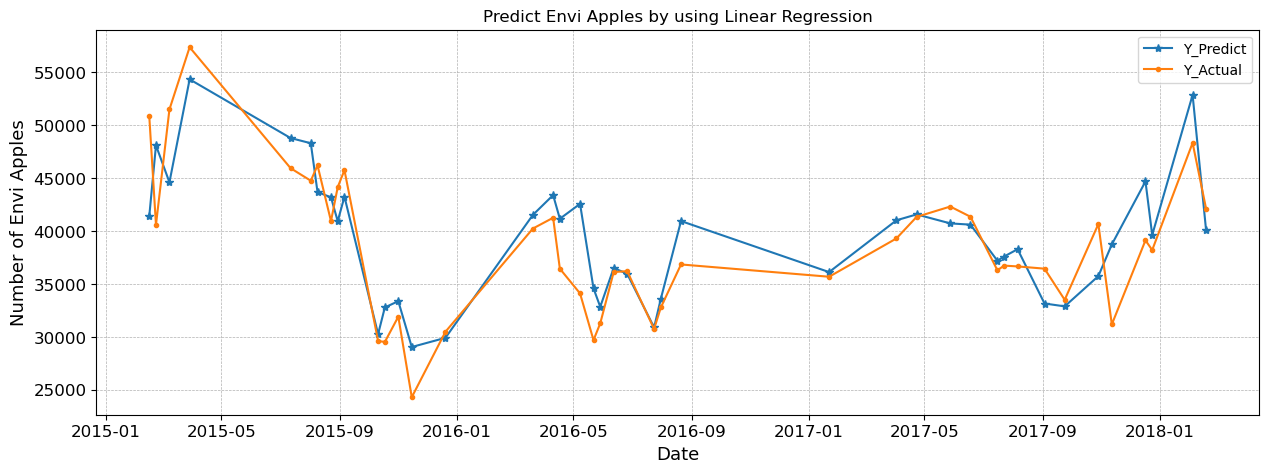

In [14]:
plt.figure(figsize=(15, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(x_test[:, :1], y_predict, label="Y_Predict", marker='*')
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual", marker='.')
plt.xlabel("Date", fontsize=13)
plt.ylabel("Number of Envi Apples", fontsize=13)
plt.title("Predict Envi Apples by using Linear Regression")
plt.grid(linestyle='--', linewidth='0.5')
plt.legend()
plt.show()